# Linear Regression - recitation

``
In this short excersice, you will experience with implementing linear regression for 2D points.
It may give you a deeper understanding about the limits this model has, and how it works.
``

## Imports

In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np

## Generate Data

In [3]:
NOISE = 15
NUM_SAMPLES = 100

X, y = make_regression(n_samples=NUM_SAMPLES, n_features=1, noise=NOISE)
y = np.resize(y,(NUM_SAMPLES,1))
X.transpose();

print("X", X.shape)
print("y", y.shape)

X (100, 1)
y (100, 1)


## Plot Data

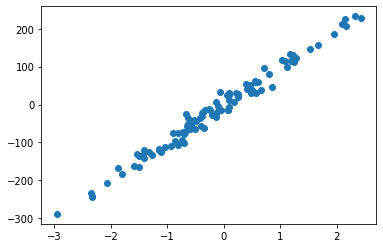

In [4]:
plt.scatter(X, y)

## Implement Linear Regression

```
If you remember, the simple Linear Regression in 2D defined as follows:

Two arrays: X = {x_1, x_2, ..., x_n}, Y = {y_1, y_2, ..., y_n}
The goal is to find values b,m such that the cost function:
```

$$Loss(b,m) = \frac{1}{n}\overset{n}{\underset{i=1}{\sum}} (m x_i + b - y_i)^2$$

```
is minimal.
The way to do it is by derivating Loss(b,m):
```
$$\frac{dL(b,m)}{db} = \frac{1}{n}\overset{n}{\underset{i=1}{\sum}} 2(m x_i + b - y_i), \hspace{1cm} \frac{dL(b,m)}{dm} = \frac{1}{n}\overset{n}{\underset{i=1}{\sum}} 2x_i(m x_i + b - y_i)$$

```
And do gradient steps with it:
```

$$b_{j+1} = b_{j} - \alpha \frac{dL(b_j,m_j)}{db}, \hspace{1cm} m_{j+1} = m_{j} - \alpha \frac{dL(b_j,m_j)}{dm}$$

($\alpha$ = learning rate)

In [7]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=10000, learning_rate=0.0001):
    N = float(len(y)) # Number of examples
    
    m_list = [m_current]
    b_list = [b_current]
    
    # Perform Gradient (GD)
    for i in range(epochs):
        # Evaluate current model
        y_current = b_current + m_current*X
        
        sub = np.array(y - y_current)
        sub_square = sub ** 2
        cost = (1/N) * np.sum(sub_square)
        
        # Calculate Gradient
        m_gradient = -(2/N) * np.sum(X*sub)
        b_gradient = -(2/N) * np.sum(sub)
        
        # Make one GD step
        m_current = m_current - (learning_rate*m_gradient)
        b_current = b_current - (learning_rate*b_gradient)
         
        m_list.append(m_current)
        b_list.append(b_current)
          
    return m_current, b_current, cost, m_list, b_list

## Do Regression

In [8]:
m, b, cost, m_list, b_list = linear_regression(X, y, # The examples
                                               m_current=10, b_current=-10, # The starting point for m and b
                                               learning_rate=0.3, # The learning rate, will be discussed later
                                               epochs=50 # Number of GD steps
                                              )

## Plot data and learned model line

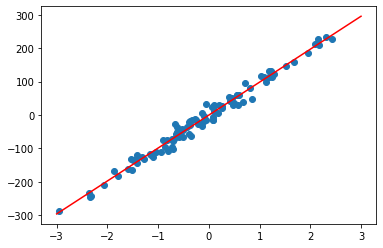

In [9]:
# Plot data
plt.scatter(X, y)

# Plot model line
x1 = -3
x2 = 3
y1 = m * x1 + b
y2 = m * x2 + b

plt.plot([x1, x2 ], [y1, y2], 'r-')

# Visualizing Gradient Descent and learning rate

``Now lets see how the gradient descent process works in our linear regression function``

## Create a function to calculate the cost for each value of m and b

In [16]:
def calc_cost(X, Y, m, b):
    """
    X: array
    Y: array
    """
    
    N = len(y)
    y_current = b + (m*X)
    sub = np.array(y - y_current)
    sub_square = sub ** 2
    cost = (1/N) * np.sum(sub_square)
    
    return cost

calc_cost_v = np.vectorize(lambda m, b: calc_cost(X, y, m, b))

## Do regression with different learning rates

In [17]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.94]
n_lr = len(learning_rates)
ms, bs, costs, m_lists, b_lists = [None] * n_lr, [None] * n_lr, [None] * n_lr, [None] * n_lr, [None] * n_lr

for i, lr in enumerate(learning_rates):
    ms[i], bs[i], costs[i], m_lists[i], b_lists[i] = linear_regression(X, y, m_current=10, b_current=-10, learning_rate=lr, epochs=50)

## Plot the loss and the learning curve

``In this part we will draw the movement of m and b regarding the different learning rates.
This can give us a notion about how the choice of lr impact the convergence of the algorithm.``

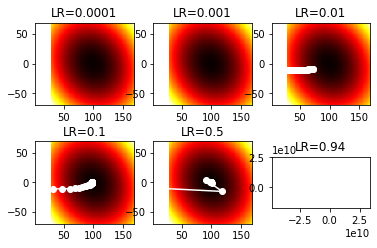

In [18]:
# Determine range for plotting
x_start, x_end, y_start, y_end = m-70, m+70, b-70, b+70
m_range = np.linspace(x_start, x_end, 100)
b_range = np.linspace(y_start, y_end, 100)

# Calculate loss function
mm, bb = np.meshgrid(m_range, b_range)
loss_surface = calc_cost_v(mm, bb)

# Plot learning curves
f, axarr = plt.subplots(2, 3)
for i in range(n_lr):
    axarr[i//3,i%3].set_title('LR={}'.format(learning_rates[i]))
    axarr[i//3,i%3].imshow(loss_surface, cmap='hot', interpolation='nearest', extent=[int(x_start), int(x_end), int(y_start), int(y_end)])
    axarr[i//3,i%3].plot(m_lists[i] ,b_lists[i], 'w-o')

### Bonus* - Polynomial regression

In [29]:
Y_poly = 3*X**2 - 2*X + 15

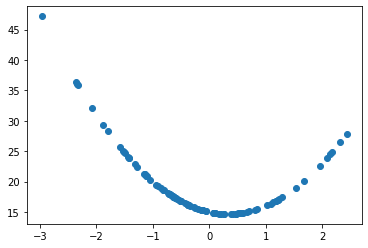

In [30]:
plt.scatter(X, Y_poly)

```
Try to modify the function "linear_regression" so now it will return parameters a,b,c such that minimize the cost:
```
$$Loss(b,m) = \frac{1}{n}\overset{n}{\underset{i=1}{\sum}} (a x_i^2 + bx_i + c - y^{(poly)}_i)^2$$


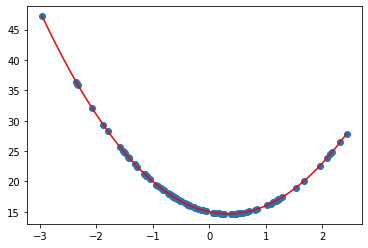

In [45]:
def linear_regression(X, y, a=0, b=0, c=0, epochs=10000, learning_rate=0.0001):
    N = float(len(y)) # Number of examples
    
    a_list = [a]
    b_list = [b]
    c_list = [c]
    
    # Perform Gradient (GD)
    for i in range(epochs):
        # Evaluate current model
        y_current = c + b*X + a*(X**2)
        
        sub = np.array(y - y_current)
        sub_square = sub ** 2
        cost = (1/N) * np.sum(sub_square)
                
        # Calculate Gradient
        a_gradient = -(2/N) * np.sum((X**2)*sub)
        b_gradient = -(2/N) * np.sum(X*sub)
        c_gradient = -(2/N) * np.sum(sub)
        
        a_gradient = -(2 / N) * sum((X**2) * (y - y_current)) # Derivative with respect to a
        b_gradient = -(2 / N) * sum(X * (y - y_current)) # Derivative with respect to b
        c_gradient = -(2 / N) * sum(y - y_current) # Derivative with respect to c
        
        # Make one GD step
        a = a - (learning_rate * a_gradient) # Update a
        b = b - (learning_rate * b_gradient) # Update b
        c = c - (learning_rate * c_gradient) # Update c
         
        a_list.append(a)
        b_list.append(b)
        c_list.append(c)
          
    return a, b, c, cost, a_list, b_list, c_list

a, b, c, cost, a_list, b_list, c_list = linear_regression(X, Y_poly, # The examples
                                            a=10, b=-10, c=10, # The starting point for a, b and c
                                               learning_rate=0.03, # The learning rate, will be discussed later
                                               epochs=500 # Number of GD steps
                                              )

# print("a", a, "b", b, "c", c)

plt.scatter(X, Y_poly)

x_line = np.linspace(np.min(X), np.max(X), 500)
y_line = (a) * x_line**2 + (b) * x_line + (c)

plt.plot(x_line, y_line, 'r-')

# Test for values of A
# plt.figure()
# plt.plot(np.arange(len(a_list)), a_list)
# plt.show()